**CATS VS DOGS**

In [5]:
# Lib imports
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np

In [50]:
#import for data splitting 
import os
import shutil
import random

base_dir = r"C:\Users\User\Documents\Neural Network Assignment 6\catvdog"

# sources
cat_source = os.path.join(base_dir, "original", "cat")
dog_source = os.path.join(base_dir, "original", "dog")

# destinations
train_cat = os.path.join(base_dir, "train", "cat")
test_cat  = os.path.join(base_dir, "test", "cat")
train_dog = os.path.join(base_dir, "train", "dog")
test_dog  = os.path.join(base_dir, "test", "dog")

for folder in [train_cat, test_cat, train_dog, test_dog]:
    os.makedirs(folder, exist_ok=True)

def split_data(source, train_dest, test_dest, ratio=0.8):
    files = os.listdir(source)
    random.shuffle(files)
    split = int(len(files) * ratio)
    train_files = files[:split]
    test_files  = files[split:]

    for f in train_files:
        shutil.copy(os.path.join(source, f), train_dest)

    for f in test_files:
        shutil.copy(os.path.join(source, f), test_dest)

# run split
split_data(cat_source, train_cat, test_cat)
split_data(dog_source, train_dog, test_dog)

print("DONE — Clean split completed.")


DONE — Clean split completed.


In [51]:
# IMAGE PARAMETERS
# Used to resize the input images, also will determine the input size of your input layer.
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [52]:
# DATA PREPROCESSING & AUGMENTATION
# Optional but recommended for image processing tasks, especially with limited data.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 16000 images belonging to 2 classes.
Found 3998 images belonging to 2 classes.
Found 3998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [53]:
#CNN MODEL ARCHITECTURE

# Some modifications are applied
initial_learning_rate = 0.001
# We are combining ExponentialDecay with Adam optimizer for better learning rate management
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

# Create the optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Applied dropout layers to reduce overfitting and L2 regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', 
                  kernel_regularizer=tf.keras.regularizers.l2(0.001),
                  input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [54]:
# Configure the model optimizers, loss function, and metrics
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # old
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
# TRAINING THE CNN
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 250s 493ms/step - accuracy: 0.5058 - loss: 0.8052 - val_accuracy: 0.5175 - val_loss: 0.7224
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 250s 493ms/step - accuracy: 0.5058 - loss: 0.8052 - val_accuracy: 0.5175 - val_loss: 0.7224
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 179s 358ms/step - accuracy: 0.5603 - loss: 0.7078 - val_accuracy: 0.5693 - val_loss: 0.6959
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 179s 358ms/step - accuracy: 0.5603 - loss: 0.7078 - val_accuracy: 0.5693 - val_loss: 0.6959
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 270s 540ms/step - accuracy: 0.5706 - loss: 0.6930 - val_accuracy: 0.5945 - val_loss: 0.6826
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 270s 540ms/step - accuracy: 0.5706 - loss: 0.6930 - val_accuracy: 0.5945 - val_loss: 0.6826
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 271s 541ms/step - accuracy: 0.5846 - loss: 0.6815 - val_accuracy: 0.5940 - val_loss: 0.6665
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 271s 541ms/step - accuracy: 0.5846 -

In [56]:
# EVALUATE THE MODEL
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.7288 - loss: 0.5633
Test Accuracy: 0.7287999987602234
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.7288 - loss: 0.5633
Test Accuracy: 0.7287999987602234


In [ ]:
# SAVE THE MODEL
model.save('exercise_6_catvsdog_palabrica.h5')

In [1]:
# SIMPLE INFERENCE SCRIPT FOR CATS VS DOGS
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Full path to your trained model
MODEL_PATH = r"C:\Users\User\Downloads\FINAL\Files\exercise_6_catvsdog_palabrica.h5"

# Load the model once
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model not found at: {MODEL_PATH}")
model = tf.keras.models.load_model(MODEL_PATH)

# Derive required input size from the model to avoid mismatches
_input_shape = model.input_shape
if isinstance(_input_shape, list):
    _input_shape = _input_shape[0]
if (
    _input_shape is None
    or len(_input_shape) < 4
    or _input_shape[1] is None
    or _input_shape[2] is None
):
    IMG_SIZE = (128, 128)  # fallback if model doesn't specify
else:
    IMG_SIZE = (int(_input_shape[1]), int(_input_shape[2]))

# Optional: quick confirmation
print(f"Model expects input size: {IMG_SIZE}")

def _preprocess(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    arr = image.img_to_array(img).astype("float32") / 255.0
    return np.expand_dims(arr, axis=0)

def predict_image(img_path):
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        return

    # Make prediction
    batch = _preprocess(img_path)
    pred = float(model.predict(batch, verbose=0)[0, 0])  # single value for binary classification

    # Convert prediction to label + confidence (probability of predicted class)
    if pred >= 0.5:
        label = "Dog"
        confidence = pred
    else:
        label = "Cat"
        confidence = 1.0 - pred

    print(f"Prediction for {img_path}: {label} (confidence: {confidence:.2f})")




Model expects input size: (128, 128)


In [3]:
# IMAGE LOADING & DISPLAY WITH PREDICTION TITLE
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def load_show_and_predict(img_path):
    # Check file exists
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        return
    
    # --- Run prediction ---
    batch = _preprocess(img_path)
    pred = float(model.predict(batch, verbose=0)[0, 0])

    if pred >= 0.5:
        label = "Dog"
        confidence = pred
    else:
        label = "Cat"
        confidence = 1.0 - pred

    # --- Load & show image ---
    img = image.load_img(img_path, target_size=IMG_SIZE)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label} (confidence: {confidence:.2f})")
    plt.show()

    # Also print in console
    print(f"Prediction for {img_path}: {label} (confidence: {confidence:.2f})")


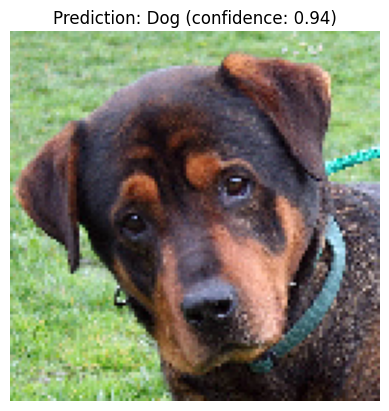

Prediction for C:\Users\User\Documents\dog1.jpg: Dog (confidence: 0.94)


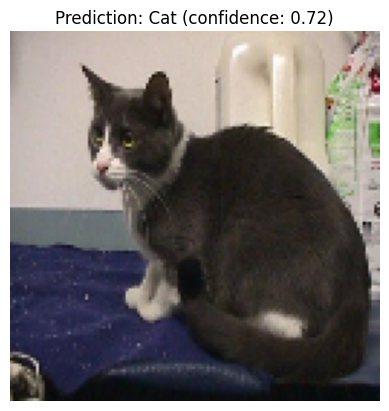

Prediction for C:\Users\User\Documents\cat1.jpg: Cat (confidence: 0.72)


In [4]:
load_show_and_predict(r"C:\Users\User\Documents\dog1.jpg")
load_show_and_predict(r"C:\Users\User\Documents\cat1.jpg")
